<a href="https://colab.research.google.com/github/Navin412/DS_AI/blob/main/1_Getting_Started_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chatbots With Langgraph

In [18]:
!pip install langgraph langsmith

In [19]:
!pip install langchain langchain_groq langchain_community

In [20]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGCHAIN_API_KEY')
print(langsmith)


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


In [21]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [22]:
from langchain_groq import ChatGroq

In [23]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78fefc8d8350>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78fefc7030d0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [24]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [25]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [26]:
graph_builder

In [27]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [28]:
graph_builder.add_node("chatbot",chatbot)

In [29]:
graph_builder

In [30]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [31]:
graph=graph_builder.compile()

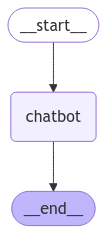

In [32]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [33]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: what is LangGraph state?
dict_values([{'messages': AIMessage(content='LangGraph\'s state refers to the internal representation of information the model uses while processing language. \n\nUnfortunately, without access to LangGraph\'s internal documentation or code, I can\'t give you specific details about the exact structure of its state. \n\nHowever, I can offer some general insights based on common practices in language models:\n\n* **Token Embeddings:** LangGraph likely represents each word or token in the input text as a vector of numbers (a "embedding"). These embeddings capture semantic meaning and relationships between words.\n* **Hidden States:** As LangGraph processes the text, it generates a sequence of hidden states. Each hidden state represents a compressed representation of the information processed up to that point. These states evolve and change based on the input and the model\'s parameters.\n* **Attention Mechanisms:** LangGraph might utilize attention mechanisms